# Exponential Interpolation and Continuous Compounding

Exponential interpolation of discount factors assumes a constant continuously compounded rate between known points. This is a key technique in yield curve construction.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Key Formulas

For discount factors $D_1$ and $D_2$ at times $t_1$ and $t_2$:

1. **Implied continuous rate**: $r = -\frac{\ln(D_2/D_1)}{t_2-t_1}$

2. **Exponential interpolation formula**: $D(t) = D_1 \cdot \left(\frac{D_2}{D_1}\right)^{\frac{t-t_1}{t_2-t_1}}$

This is equivalent to: $D(t) = D_1 \cdot e^{-r(t-t_1)}$

In [2]:
# Example: Interpolate between two discount factors
t1, t2 = 1.0, 3.0   # Time points (years)
df1, df2 = 0.96, 0.85  # Discount factors

# Calculate implied rate
r_implied = -math.log(df2 / df1) / (t2 - t1)
print(f"Implied continuous rate: {r_implied:.4f} ({r_implied*100:.2f}%)")

# Interpolate at t = 2 years using both methods
t_target = 2.0

# Method 1: Direct exponential formula
weight = (t_target - t1) / (t2 - t1)
df_exp = df1 * (df2/df1)**weight

# Method 2: Using implied rate
df_rate = df1 * math.exp(-r_implied * (t_target - t1))

print(f"Exponential interpolation: {df_exp:.6f}")
print(f"Using implied rate: {df_rate:.6f}")
print(f"Difference: {abs(df_exp - df_rate):.12f}")

Implied continuous rate: 0.0608 (6.08%)
Exponential interpolation: 0.903327
Using implied rate: 0.903327
Difference: 0.000000000000


## Comparison with Linear Interpolation

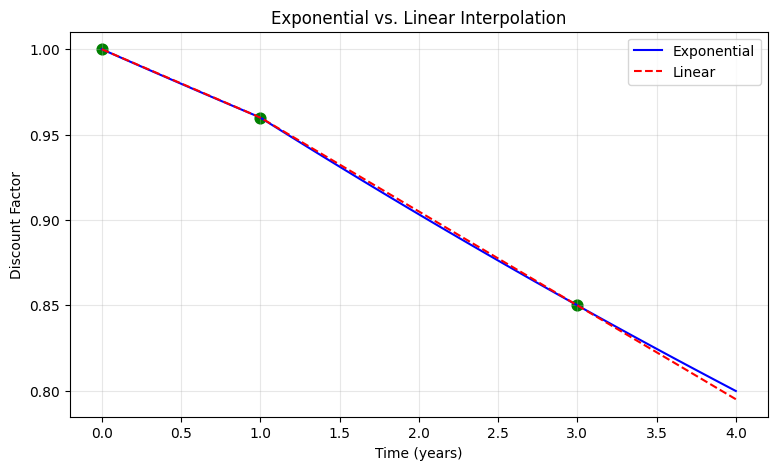

In [3]:
# Generate time points
times = np.linspace(0, 4, 100)
df0 = 1.0  # Discount factor at t=0

# Calculate exponential interpolation
r_01 = -math.log(df1 / df0) / t1  # Rate from t=0 to t=1

exp_dfs = []
linear_dfs = []

for t in times:
    # Exponential interpolation/extrapolation
    if t <= t1:
        exp_df = df0 * math.exp(-r_01 * t)
    elif t <= t2:
        exp_df = df1 * math.exp(-r_implied * (t - t1))
    else:
        exp_df = df2 * math.exp(-r_implied * (t - t2))
    exp_dfs.append(exp_df)
    
    # Linear interpolation/extrapolation
    if t <= t1:
        lin_df = df0 + (df1 - df0) * (t / t1)
    elif t <= t2:
        lin_df = df1 + (df2 - df1) * ((t - t1) / (t2 - t1))
    else:
        slope = (df2 - df1) / (t2 - t1)
        lin_df = df2 + slope * (t - t2)
    linear_dfs.append(lin_df)

# Plot
plt.figure(figsize=(9, 5))
plt.plot(times, exp_dfs, 'b-', label='Exponential')
plt.plot(times, linear_dfs, 'r--', label='Linear')
plt.scatter([0, t1, t2], [df0, df1, df2], color='green', s=60)

plt.xlabel('Time (years)')
plt.ylabel('Discount Factor')
plt.title('Exponential vs. Linear Interpolation')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Application to Future Value Factors

The same principles apply to future value (at-maturity) factors, which are reciprocals of discount factors.

For future value factors $FV_1$ and $FV_2$ at times $t_1$ and $t_2$:

1. **Implied rate**: $r = \frac{\ln(FV_2/FV_1)}{t_2-t_1}$

2. **Interpolation formula**: $FV(t) = FV_1 \cdot \left(\frac{FV_2}{FV_1}\right)^{\frac{t-t_1}{t_2-t_1}}$

In [4]:
# Example with future value factors
fv1, fv2 = 1.04, 1.15  # Future value factors at t1 and t2

# Calculate implied rate
r_fv = math.log(fv2 / fv1) / (t2 - t1)
print(f"Implied rate from FV factors: {r_fv:.4f} ({r_fv*100:.2f}%)")

# Verify this matches the rate from discount factors
print(f"Rate from discount factors: {r_implied:.4f} ({r_implied*100:.2f}%)")

# Note: If fv1 = 1/df1 and fv2 = 1/df2, then r_fv ≈ r_implied

Implied rate from FV factors: 0.0503 (5.03%)
Rate from discount factors: 0.0608 (6.08%)


## Why Use Exponential Interpolation?

1. **Economic consistency**: Preserves the constant continuously compounded rate assumption

2. **No-arbitrage**: Maintains mathematical consistency in forward rates

3. **Term structure properties**: Produces smooth discount curves and forward rates

4. **Industry standard**: Widely used in yield curve construction and fixed income analytics